<a href="https://colab.research.google.com/github/AlexanderKClark/MAT421/blob/main/MAT421_HW5ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAT421 HW5 - Alexander Clark
This homework covers the contents of 1.1 through 1.3 of the [lecture notes](https://canvas.asu.edu/courses/208345/files/99130204) and uses the relevent contents from the [textbook](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html).

##1.1 Introduction
Linear algebra plays a particularly important role in the numerous discplines. This will cover vector spaces, orthogonality, eigenvalues, matrix decomposition, and linear regression.

## 1.2 Elements of Linear Algebra
**Definition**: A *linear combination* in linear algebra is a new vector constructed from a subset by multiplying each vector by a constant and adding the results.


**Definition**: A *linear subspace* of $V$ is a subset $U ⊆ V$
that is closed under vector addition and scalar multiplication. That is, for all
$u_1, u_2 \in U$ and
$α \in R$, it holds that
$u_1 + u_2 \in U$, and
$α \cdot u_1 \in U$.


**Definition**: Let $w_1,\dots, w_m \in V$. The *span* of ${w_1,\dots, w_m}$, denoted $\text{span}(w_1,\dots, w_m)$, is the set of all linear combinations of the $w_{j}$’s. That is,
$\text{span}(w_1,\dots , w_m) = \displaystyle{\bigg\{∑\limits_{j=1}^m a_jw_j:a_1\dots,a_m\in\mathbb{R}\bigg\}}$.

**Definition**: Let $A \in \mathbb{R}^{n×m}$ be an $n×m$ matrix with columns
$a_1,\dots, a_m \in \mathbb{R}^n$. The *column space* of $A$, denoted col$(A)$, is the span of the
columns of $A$, that is, col$(A) = \text{span}(a_1,\dots , a_m) \in \mathbb{R}^n$.

**Definition**: A list of vectors $u_1, \dots, u_m$ is *linearly
independent* if none of them can be written as a linear combination of the
others, that is,
$∀i, u_i ∉ \text{span}({uj: j \neq i})$.
A list of vectors is called linearly dependent if it is not linearly independent.

In [8]:
import numpy as np
from numpy.linalg import det

a=np.array([[1,3,5],[3,9,0],[9,8,4]])
np.linalg.det(a)

-285.00000000000006

And therefore the system corresponding to $
\begin{bmatrix}
1 & 3 & 5 \\
3 & 9 & 0 \\
9 & 8 & 4
\end{bmatrix}
$is linearly independent since the determinant is nonzero.

**Definition**: Let $U$ be a linear subspace of $V$ . A *basis* of $U$
is a list of vectors $u_1,\dots, u_m$ in $U$ that: span $U$, that is, $U = \text{span}(u_1, \dots, u_m)$
and are linearly independent.

**Theorem**: Let $U$ be a linear subspace of $V$. Any
basis of $U$ always has the same number of elements. All bases of $U$ have the same length, that is, the same number of elements. We call this number the *dimension* of $U$ and denote it $\text{dim}(U)$.

**Definition**: A list of vectors ${u_1,\dots, u_m}$ is *orthonormal* if the $u_i$’s are pairwise orthogonal and each has norm 1, that is for all $i$ and all $j \neq i$,
$⟨u_i, u_j⟩ = 0$, and $||u_i|| = 1$.

**Theorem**: Let $\mathscr{U}⊆V$ be a linear subspace with orthonormal basis $q_1,\dots,q_m$ ane let $v\in V$. For any $u∈\mathscr{U}$,

$
\begin{equation*}
||v-\mathscr{P}_{\mathscr{U}}v||\leq||v-u||.
\end{equation*}
$

**Definition**: Let $A ∈ R^{d×d}$ be a square
matrix. Then
$λ \in \mathbb{R}$ is an eigenvalue of $A$ if there exists a nonzero vector $x \neq 0$
such that
$Ax = λ x$.
The vector $x$ is referred to as an eigenvector.

## 1.3 Linear Regression
QR decomposition is a procedure to solve linear least squares problems.

In [7]:
import numpy as np
from numpy.linalg import qr

a=np.array([[1,3,5],[3,9,0],[9,8,4]])
p=[5,7,2,10]

np.linalg.qr(a)

QRResult(Q=array([[-1.04828484e-01, -2.98347095e-01, -9.48683298e-01],
       [-3.14485451e-01, -8.95041285e-01,  3.16227766e-01],
       [-9.43456353e-01,  3.31496772e-01,  3.33066907e-16]]), R=array([[ -9.53939201, -10.69250533,  -4.29796783],
       [  0.        ,  -6.29843867,  -0.16574839],
       [  0.        ,   0.        ,  -4.74341649]]))

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.49798   ]
 [0.99980071]]


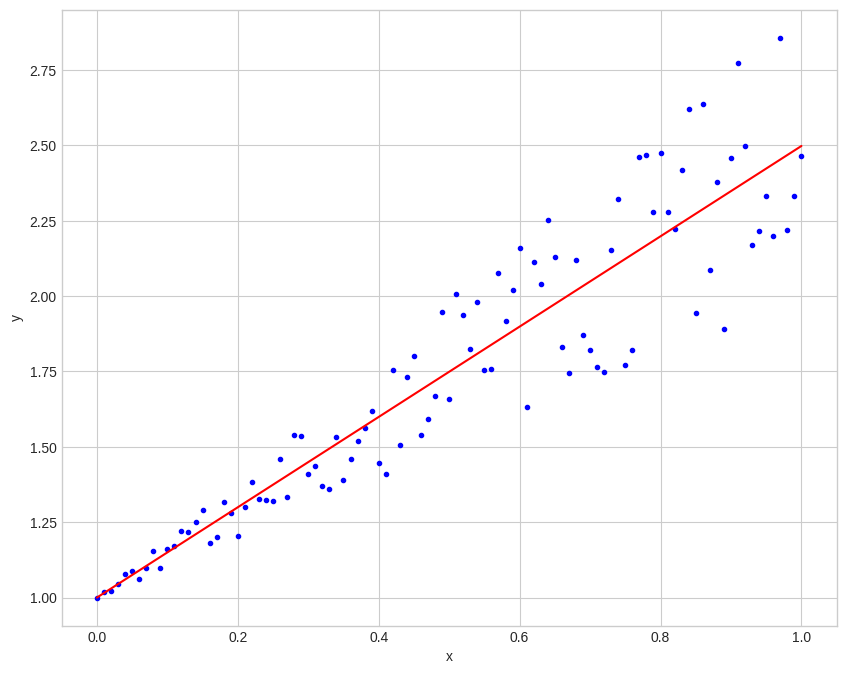

In [3]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()